In [1]:
170405

170405

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Tarefa 4 - Decision Trees, Random Forest and K-Means
Fourth assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using decision trees and random forests to solve a real-world problem in classification and delve into the world of unsupervised learning by implementing the K-means algorithm. Students will also get used to generating important plots during training to analyse the models' behaviour. 

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Decision Trees](#Decision_Trees) (30%)
2. [Random Forest](#Random_Forest) (30%)
3. [K-Means](#K-Means) (30%)

### Decision_Trees
## Part 1 - Decision Trees for Classification (value: 30%)

In [3]:
# load the data
ddi_df = pd.read_csv('ddi_dt_sample.csv') # don't forget to change the path

In [4]:
# inspect the data
ddi_df

,drug1,drug2,ddi,pca_max_0,pca_max_1,pca_max_2,pca_max_3,pca_max_4,pca_max_5,pca_max_6,...,pca_min_17,pca_min_18,pca_min_19,pca_min_20,pca_min_21,pca_min_22,pca_min_23,pca_min_24,pca_min_25,pca_min_26
0,CID000002725,CID000013342,0.0,-2.383210,-0.066904,0.051153,0.058145,0.398508,0.215271,-0.267814,...,-0.366350,-1.091191,-1.021989,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.091330,-0.195522
1,CID000002802,CID000013342,0.0,-2.554958,-0.066904,0.053715,0.058145,0.398508,0.131852,-0.267814,...,-0.366350,0.106596,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
2,CID000002083,CID000013342,0.0,9.908402,-0.066904,0.122384,0.058145,0.398508,0.098734,0.041276,...,-0.366350,0.102901,0.010149,-0.088365,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
3,CID000004034,CID000013342,0.0,-2.547375,-0.066904,0.051884,0.058145,0.398508,0.203962,-0.267814,...,-0.366350,-1.011102,-0.944133,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
4,CID000003899,CID000013342,0.0,-2.554958,-0.066904,0.051083,0.058145,0.398508,0.138126,-0.267814,...,-0.366350,0.075010,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,CID000002083,CID000002160,1.0,10.213277,-0.355555,0.122384,0.024324,0.144197,0.286870,0.041276,...,-0.743211,-0.148822,0.030291,-0.088365,-0.131963,0.010439,0.014404,-0.130975,0.003776,-0.043334
776,CID000002088,CID000002160,1.0,10.213277,-0.355555,0.048850,-0.064623,0.097114,0.286870,-0.235796,...,-0.743211,-0.148822,0.041925,-0.106078,-0.131963,0.157741,-0.055455,-0.130975,-0.030832,-0.053976
777,CID000001206,CID000002160,0.0,10.213277,-0.355555,-0.210680,-0.646083,-0.111940,0.290024,-0.235796,...,-1.269156,-0.148822,0.259326,-0.247741,-0.193907,0.076300,0.023777,-0.130975,0.006320,-0.070912
778,CID000002118,CID000002160,1.0,10.213277,-0.355555,0.062143,-0.017338,0.059182,0.286870,-0.235796,...,-0.743211,-0.148822,0.059779,-0.072749,-0.131963,0.077367,0.026625,-0.130975,-0.021027,-0.047147


As you can observe, the first 2 columns represent the IDs of the drugs in each combination. The 3rd column represents the binary label indicating if the pair causes an adverse interaction or not. The remaining 54 columns are the features based on the PCA representations of individual drug targets. 

In [5]:
## your code goes here:

# Separando as features dos targets
y = ddi_df["ddi"].to_numpy()
X = ddi_df.drop(["drug1", "drug2", "ddi"], axis = 1).to_numpy()

# Separando em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [6]:
# Função para dividir uma região
def split_region(region, feature_index, tau):
    # Array de booleanos para filtrar os registros
    split = region[:, feature_index] < tau
    # Array com os índices dos registros nessa região
    indices = np.array(range(region.shape[0]))

    # Encontrando as partições
    left_partition = indices[split]
    right_partition = indices[~split]

    return left_partition, right_partition


# Função para calcular a entropia de um nó
def entropy(region):
    # region é o array com os targets dos datapoints naquela região

    # Lista com as classes existentes
    classes = np.unique(region)

    # Inicializando a entropia
    entropy = 0

    # Para cada classe...
    for each_class in classes:
        # Calcula a proporção dela no nó
        proportion = np.sum(region == each_class)/region.size
        # Se essa proporção for 0, pula para a próxima classe
        if proportion == 0:
            continue
        # Soma à entropia
        entropy -= proportion*np.log2(proportion)

    return entropy


# Função para obter a melhor divisão de uma região
def get_split(X, y, available_features = None):
    # Inicializando as melhores configurações de divisão
    best_feature = 0
    best_tau = 0
    best_gain = 0

    # Calculando a entropia do nó
    node_entropy = entropy(y)

    # Para cada feature...
    for feature in (range(X.shape[1]) if available_features is None else available_features):
        # Cria a lista dos taus a serem testados, sendo os valores desses dados para essa feature
        # adicionado com um valor maior que todos eles
        taus = np.unique(X[:, feature])
        taus = np.append(taus, np.max(taus) + 1)

        # Para cada tau...
        for tau in taus:
            # Divide a região
            left, right = split_region(X, feature, tau)
            # Calcula o ganho de informação
            weighted_entropy = (left.size/X.shape[0])*entropy(y[left]) + (right.size/X.shape[0])*entropy(y[right])
            gain = node_entropy - weighted_entropy

            # Se esse ganho for maior que o melhor até agora...
            if gain > best_gain:
                # Atualiza as melhores configurações para essa
                best_feature = feature
                best_tau = tau
                best_gain = gain

    # Dividindo a região com as melhores configurações
    left_region, right_region = split_region(X, best_feature, best_tau)

    # Criando o dicionário com as informações solicitadas
    decision = {"feature_index": best_feature, "tau": best_tau, "left_region": left_region, "right_region": right_region}

    return decision


# Função para crescer uma árvore recursivamente
def recursive_growth(node, min_samples, max_depth, current_depth, X, y, available_features = None):
    # Para cada região...
    for region in ["left_region", "right_region"]:
        # Pega os índices dos registros dessa região
        region_indices = node[region]
        # Se algum dos critérios de parada for atendido...
        if region_indices.size <= min_samples or current_depth == max_depth:
            # Esse nó é uma folha e passa a armazenar apenas a frequência de valores positivos
            if region_indices.size == 0:
                new_node = {"value": 0.0}
            else:
                new_node = {"value": np.sum(y[region_indices] == 1)/region_indices.size}
        # Se não...
        else:
            # Faz uma nova divisão
            new_node = get_split(X[region_indices], y[region_indices], available_features)
            # E começa a crescer recursivamente a partir desse nó
            recursive_growth(new_node, min_samples, max_depth, current_depth + 1, X[region_indices], y[region_indices], available_features)

        # Se estamos falando da região da esquerda...
        if region == "left_region":
            # Adiciona esse novo nó como o filho da esquerda do nó atual
            node['left'] = new_node
        # Se não...
        else:
            # Adiciona-o como o filho da direita
            node['right'] = new_node

In [7]:
# Função para predizer um dado
def predict_sample(node, sample):
    # Enquanto não chegar a uma folha...
    while "value" not in node.keys():
        # Se o valor desse datapoint para a feature desse nó for menor que o limiar desse nó...
        if sample[node["feature_index"]] < node["tau"]:
            # Vai para o nó da esquerda
            node = node["left"]
        # Se não...
        else:
            # Vai para o da direita
            node = node["right"]

    # A previsão é o valor da folha alcançada
    pred = node["value"]

    return pred

    
# Função para predizer um conjunto de dados
def predict(node, X):
    # Número de dados
    n_of_datapoints = X.shape[0]

    # Array para armazenar as previsões
    y_pred = np.zeros(n_of_datapoints)

    # Para cada dado...
    for datapoint in range(n_of_datapoints):
        # Faz sua previsão e armazena-a no array
        pred = predict_sample(node, X[datapoint])
        y_pred[datapoint] = pred

    return y_pred

In [8]:
# Função da entropia cruzada
def cross_entropy(y_true, y_pred):
    # Calculando o erro base
    error = -np.sum(y_true * np.log(y_pred + 0.001) + (1 - y_true) * np.log(1 - y_pred + 0.001))
    return error


# Função para calcular a acurácia
def calculate_acc_score(y_true, y_pred):
    y_pred_copy = y_pred.copy()

    # Binarizando as predições
    y_pred_copy[y_pred_copy > 0.5] = 1
    y_pred_copy[y_pred_copy <= 0.5] = 0

    # Comparando os arrays e contando o número de predições verdadeiras
    correct_predictions = np.sum(y_true == y_pred_copy)
    # Calculando a acurácia
    accuracy = correct_predictions/y_true.size

    return accuracy


# Função da cross-validation para árvores de decisão
def trees_cross_validation(X_train, y_train, max_depth):
    # Divide os dados em três pastas
    Xs = np.array_split(X_train, 3)
    ys = np.array_split(y_train, 3)

    # Possíveis configurações de (treino, treino, teste)
    settings = [(0, 1, 2), (0, 2, 1), (1, 2, 0)]
    # Inicializando o erro, a acurácia e a AUROC
    error = 0
    accuracy = 0
    auroc = 0

    # Para cada configuração...
    for train1, train2, val in settings:
        # Cria os conjuntos atuais de treino e validação
        current_X_train = np.vstack((Xs[train1], Xs[train2]))
        current_y_train = np.hstack((ys[train1], ys[train2]))
        current_X_val = Xs[val]
        current_y_val = ys[val]

        # Inicializa e cresce a árvore com o conjunto de treino atual
        root = get_split(current_X_train, current_y_train)
        recursive_growth(root, 15, max_depth, 1, current_X_train, current_y_train)
        # Prediz o conjunto de validação atual
        val_pred = predict(root, current_X_val)
        # Soma o erro, a acurácia e a AUROC dessa configuração ao erro, à acurácia e à AUROC totais
        error += cross_entropy(current_y_val, val_pred)
        accuracy += calculate_acc_score(current_y_val, val_pred)
        auroc += roc_auc_score(current_y_val, val_pred)


    # Retorna as médias do erro, da acurácia e da AUROC
    return {"error": error/3, "accuracy": accuracy/3, "auroc": auroc/3}

In [9]:
# Valores de max_depth a serem testados
max_depths = [4, 6, 8]

# Inicializando a melhor max_depth e a melhor avaliação
best_max_depth = -1
best_evaluation = {"auroc": 0}

# Para cada profundidade máxima...
for max_depth in max_depths:
    # Avalia o desempenho por meio da validação
    evaluation = trees_cross_validation(X_train, y_train, max_depth)
    # Se a AUROC desse modelo for menor que a melhor até agora...
    if evaluation["auroc"] > best_evaluation["auroc"]:
        # Atualiza a melhor max_depth e a melhor avaliação
        best_max_depth = max_depth
        best_evaluation = evaluation

print(f"Best max_depth: {best_max_depth}")
print(best_evaluation)

Best max_depth: 8
{'error': 187.3309543474006, 'accuracy': 0.7792022792022792, 'auroc': 0.843060905918399}


In [10]:
# Treinando com a melhor profundidade máxima no conjunto de treino completo
root = get_split(X_train, y_train)
recursive_growth(root, 15, best_max_depth, 1, X_train, y_train)
# Prevendo para o conjunto de teste
test_pred = predict(root, X_test)

# Calculando a acurácia e a AUROC
test_accuracy = calculate_acc_score(y_test, test_pred)
test_auroc = roc_auc_score(y_test, test_pred)

print("Test accuracy: ", test_accuracy)
print("Test AUROC: ", test_auroc)

Test accuracy:  0.782051282051282
Test AUROC:  0.8478114478114478


## Random_Forest
## Part 2 - Random Forest for Classification Networks (value: 30%)



In [11]:
## your code goes here:

# Dividindo os dados em treino, validação e teste
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 1/9)

In [12]:
# Função do bootstrap
def bootstrap(X, num_bags):
    # Número de datapoints
    n_of_datapoints = X.shape[0]
    # Array com os índices dos dados
    indices = np.array(range(n_of_datapoints))
    # Lista com os bags criados
    bags = []

    # Para cada bag...
    for _ in range(num_bags):
        # Sorteia as amostras aleatoriamente
        samples = np.random.choice(indices, size = n_of_datapoints, replace = True)
        # Adiciona-as na lista
        bags.append(samples)

    return bags


# Função para treinar uma floresta aleatória
def train_random_forest(X, y, n_of_features, min_samples, max_depth, n_of_estimators):
    # Criando os bags por meio do bootstrap
    bags = bootstrap(X, n_of_estimators)
    # Lista para armazenar as árvores
    random_forest = []

    # Para cada árvore...
    for i in range(n_of_estimators):
        # Sorteia as features que serão utilizadas
        features = np.random.choice(np.array(range(X.shape[1])), n_of_features, replace = False)
        # Filtra os dados apenas com os registros sorteados
        filtered_X = X[bags[i]]
        filtered_y = y[bags[i]]
        # Gera a árvore
        root = get_split(filtered_X, filtered_y, features)
        recursive_growth(root, min_samples, max_depth, 1, filtered_X, filtered_y, features)
        # Salva-a na lista
        random_forest.append(root)

    return random_forest

In [13]:
# Função da classificação agregada
def aggregate_classification(preds):
    # Criando um único array com todas as predições
    preds = np.array(preds)
    # Calculando as previsões finais como a frequência da previsão positiva
    mean_preds = np.sum(preds > 0.5, axis = 0)/preds.shape[0]

    return mean_preds


# Função para fazer a predição com base na floresta aleatória
def predict_random_forest(random_forest, X):
    # Lista para armazenar as predições das árvores
    preds = []

    # Para cada árvore...
    for i in range(len(random_forest)):
        # Faz a predição dos dados
        pred = predict(random_forest[i], X)
        # Insere-a na lista
        preds.append(pred)

    # Calcula a predição final
    final_pred = aggregate_classification(preds)

    return final_pred

In [14]:
# Configurações de teste (min_samples, max_depth, n_of_estimators)
settings = [(15, 8, 20), (20, 8, 15), (25, 10, 25), (20, 10, 15), (15, 8, 25)]
n_of_features = round(np.sqrt(X.shape[1]))

# Inicializando os melhores parâmetros
best_auroc = 0
best_min_samples = 0
best_max_depth = 0
best_n_of_estimators = 0

# Para cada configuração...
for min_samples, max_depth, n_of_estimators in settings:
    # Treina a floresta
    forest = train_random_forest(X_train, y_train, n_of_features, min_samples, max_depth, n_of_estimators)
    # Prediz para o conjunto de validação
    val_pred = predict_random_forest(forest, X_val)
    # Calcula a curva AUROC
    auroc = roc_auc_score(y_val, val_pred)
    # Se for maior que a melhor até agora, atualiza os melhores parâmetros
    if auroc > best_auroc:
        best_auroc = auroc
        best_min_samples = min_samples
        best_max_depth = max_depth
        best_n_of_estimators = n_of_estimators

print("Best AUROC in validation: ", best_auroc)
print(" Best min_samples: ", best_min_samples)
print(" Best max_depth: ", best_max_depth)
print(" Best n_of_estimators: ", best_n_of_estimators)

Best AUROC in validation:  0.8983957219251337
 Best min_samples:  15
 Best max_depth:  8
 Best n_of_estimators:  25


In [15]:
# Treinando a floresta com os melhores parâmetros
best_forest = train_random_forest(X_train_and_val, y_train_and_val, n_of_features, best_min_samples, best_max_depth, best_n_of_estimators)
# Predizendo no conjunto de teste
test_pred = predict_random_forest(best_forest, X_test)

# Calculando a acurácia e a AUROC
forest_accuracy = calculate_acc_score(y_test, test_pred)
forest_auroc = roc_auc_score(y_test, test_pred)

print("Test accuracy: ", forest_accuracy)
print("Test AUROC: ", forest_auroc)

Test accuracy:  0.8717948717948718
Test AUROC:  0.927807486631016


In [16]:
# COMPARANDO O DESEMPENHO DA ÁRVORE COM A FLORESTA

# Valores de max_depth a serem testados
max_depths = [6, 8, 10]

# Inicializando a melhor max_depth e a melhor AUROC
best_max_depth = -1
best_val_auroc = 0

# Para cada profundidade máxima...
for max_depth in max_depths:
    # Treina a árvore
    root = get_split(X_train, y_train)
    recursive_growth(root, 15, max_depth, 1, X_train, y_train)
    # Prediz para a validação
    val_pred = predict(root, X_val)
    # Calcula a AUROC
    val_auroc = roc_auc_score(y_val, val_pred)
    # Se a AUROC desse modelo for maior que a melhor até agora...
    if val_auroc > best_val_auroc:
        # Atualiza a melhor max_depth e a melhor AUROC
        best_max_depth = max_depth
        best_val_auroc = val_auroc

# Treinando a árvore com os melhores parâmetros
root = get_split(X_train_and_val, y_train_and_val)
recursive_growth(root, 15, best_max_depth, 1, X_train_and_val, y_train_and_val)

# Predizendo para o conjunto de teste
test_pred = predict(root, X_test)

# Calculando a acurácia e a AUROC
tree_accuracy = calculate_acc_score(y_test, test_pred)
tree_auroc = roc_auc_score(y_test, test_pred)

print("Accuracy:")
print(" Tree:  ", tree_accuracy)
print(" Forest:", forest_accuracy)
print("AUROC:")
print(" Tree:  ", tree_auroc)
print(" Forest:", forest_auroc)

Accuracy:
 Tree:   0.782051282051282
 Forest: 0.8717948717948718
AUROC:
 Tree:   0.8352272727272727
 Forest: 0.927807486631016


## K-Means
## Part 3 – Clustering with K-means (value: 40%)

In this exercise, you will explore clustering by implementing the K-means algorithm. You will write code to perform K-means clustering while visualizing the movement of the centroids at each iteration. 

To complete this exercise, you will write code to implement K-means for clustering: 

1. Dataset Preparation: Run the cells provided in the notebook that generate the artificial data points for this exercise.
2. K-means Clustering:
	- Initialize K cluster centroids by selecting K points from your dataset at random.
	- Implement a loop to perform the following steps until convergence (or until a specified maximum number of iterations is reached, e.g., 150):
        - Assign each data point to the nearest centroid (you will have to calculate the Euclidean distance between the data point and each centroid).
        - Update each centroid by moving it to the mean of all data points assigned to it.
        - Check for convergence by comparing the new centroids with the previous centroids. If the difference is smaller than an $\epsilon=1^{-4}$, exit the loop.
3. Centroid Movement Visualization:
	- At 5 different moments during training, plot a figure showing the centroids and the points. Figure 1 should show the situation at the beginning, before learning. Figure 5 should show the situation at the end of the learning. The remaining Figures 2-4 should show intermediary situations.
	- For each figure, each centroid will be represented by a large black cross and each cluster with a different colour, the points must be coloured according to their respective cluster.
4. Sum of squared distances:
	- Along with plotting the centroid movement, calculate the sum of squared distances at each iteration as follows:
        - $\sum_{j=1}^K \sum_{n \in S_j}d(x_n,\mu_j )^2$, where $K$ is the number of clusters, $x_n$ represents the $n^{th}$ datapoint, $n \in S_j$ indicates a set of points that belong to cluster $S_j$, $\mu_j$ is the mean of the datapoints in $S_j$ and $d(x_n,\mu_j)$ indicates the Euclidean distance between $x_n$ and $\mu_j$.
	- Make a plot of the sum of squared distances at each iteration. 


In [17]:
# Generate artificial data points
np.random.seed(13)
num_samples = 200
num_features = 2
X = np.random.randn(num_samples, num_features) * 1.5 + np.array([[2, 2]])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 3 + np.array([[-5, -5]])])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 2 + np.array([[7, -5]])])

In [18]:
## your code goes here:

# Função para atribuir cada datapoint ao seu cluster correspondente
def assign_clusters(X, centroids):
    # Inicializando a matriz das distâncias dos datapoints aos centróides
    distances = np.zeros((X.shape[0], centroids.shape[0]))

    # Para cada centróide...
    for i in range(centroids.shape[0]):
        # Calcula a distância dos datapoints a ele
        distance = np.sum((X - centroids[i])**2, axis = 1)
        # Salva na matriz
        distances[:, i] = distance

    # O cluster de cada datapoint corresponde ao centróide mais próximo
    clusters = np.argmin(distances, axis = 1).reshape((-1, 1))

    # Adiciona uma coluna com o cluster
    X_clustered = np.append(X, clusters, axis = 1)

    return X_clustered


# Função do algoritmo de k-means
def k_means(X, n_of_clusters, max_iteration, epsilon):
    # Listas para armazenar os centróides e os erros a cada iteração
    centroids_per_iteration = []
    error_per_iteration = []

    # Inicializando os centróides aleatoriamente
    centroids = X[np.random.choice(range(X.shape[0]), n_of_clusters)]
    # Salvando-o na lista
    centroids_per_iteration.append(centroids.copy())

    # Inicializando as variáveis de iterações, de variação dos centróides e de erro
    iteration = 0
    variation = np.inf
    error = 0

    # Enquanto o número de iterações for menor que o máximo e a variação dos centróides for maior que o epsilon...
    while iteration < max_iteration and variation > epsilon:
        # Reinicia a variação
        variation = 0
        # Atribui cada ponto a um centróide
        X_clustered = assign_clusters(X, centroids)

        # Para cada centróide...
        for i in range(n_of_clusters):
            # Pega os pontos que pertencem a ele
            points = X[X_clustered[:, -1] == i]
            # Calcula o novo centróide como a média deles
            new_centroid = np.mean(points, axis = 0)
            # Soma ao erro total a soma das distâncias quadradas à média
            error += np.sum((points - new_centroid)**2)
            # Soma a distância entre eles à variação
            variation += np.sqrt(np.sum((new_centroid - centroids[i])**2))
            # Atualiza o centróide
            centroids[i] = new_centroid

        # Salva os novos centróides na lista
        centroids_per_iteration.append(centroids.copy())
        # Salva o erro na lista
        error_per_iteration.append(error)
        # Calcula a média das variações
        variation /= n_of_clusters
        # Soma uma iteração
        iteration += 1
        # Reinicia o erro
        error = 0

    # Calculando o erro final
    X_clustered = assign_clusters(X, centroids)
    # Para cada centróide...
    for i in range(n_of_clusters):
        # Pega os pontos que pertencem a ele
        points = X[X_clustered[:, -1] == i]
        # Calcula a média dos pontos
        mean = np.mean(points, axis = 0)
        # Soma ao erro total a soma das distâncias quadradas à média
        error += np.sum((points - mean)**2)
    # Salva o erro final na lista
    error_per_iteration.append(error)

    return centroids, centroids_per_iteration, error_per_iteration

In [24]:
# Fazendo a clusterização
centroids, centroids_per_iteration, error_per_iteration = k_means(X, 3, 150, 10**(-4))

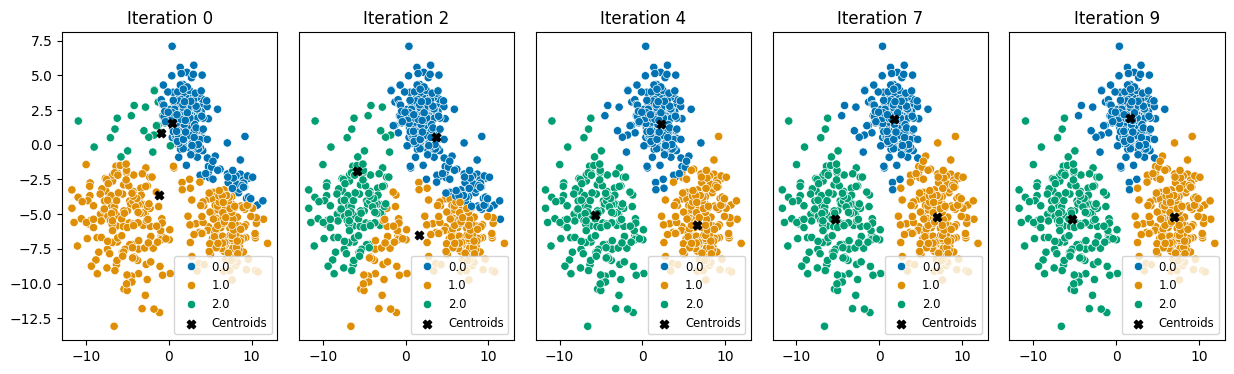

In [25]:
# Selecionando os 5 momentos do treinamento para a plotagem
displayed_iterations = np.int64(np.round(np.linspace(0, len(centroids_per_iteration) - 1, 5)))

# Criando o grid
fig, axes = plt.subplots(1, 5, figsize = (15, 4))

# Para cada momento selecionado...
for i in range(5):
    # Atribui os datapoints a seus centróides
    X_clustered = assign_clusters(X, centroids_per_iteration[displayed_iterations[i]])
    # Plota os dados
    sns.scatterplot(x = X_clustered[:, 0], y = X_clustered[:, 1], hue = X_clustered[:, 2], palette = "colorblind", ax = axes[i])
    # Plota os centróides
    axes[i].scatter(centroids_per_iteration[displayed_iterations[i]][:, 0], centroids_per_iteration[displayed_iterations[i]][:, 1], color = "black", marker = "X", label = "Centroids")
    # Ajusta o título e a legenda
    axes[i].set_title(f"Iteration {displayed_iterations[i]}")
    axes[i].legend(fontsize = "small", loc = "lower right")
    # Se não for o primeiro gráfico, tira os rótulos do eixo y
    if i > 0:
        axes[i].set_yticks([])

# Ajustando o espaço entre os gráficos
plt.subplots_adjust(wspace = 0.1)
plt.show()

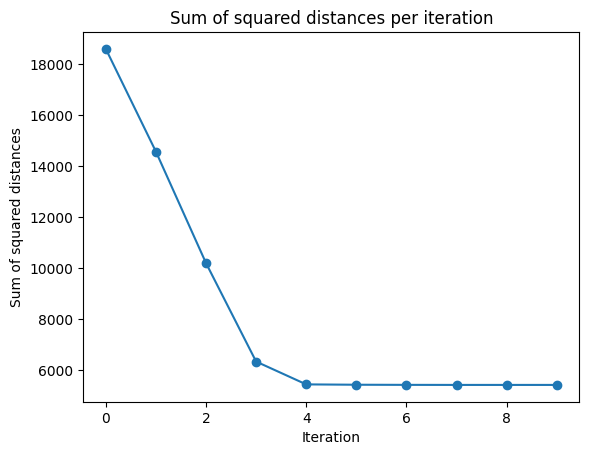

In [26]:
# Plotando o erro ao longo das iterações
plt.plot(error_per_iteration, marker = "o")
plt.title("Sum of squared distances per iteration")
plt.xlabel("Iteration")
plt.ylabel("Sum of squared distances")
plt.show()